In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [18]:
# Import the data
team_data = pd.read_csv("corrected_euro_team_data.csv")
team_data.head()


,id_match,date,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4,target_top_8
0,2036436,10/12/2023,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,0,20917,41.318403,19.823953,105,68,0,0
1,2040328,3/22/2024,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,3,21425,44.794981,10.338325,105,68,0,0
2,2039019,10/17/2023,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,0,17232,41.318403,19.823953,105,68,0,0
3,2034801,6/13/2022,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,0,21425,41.318403,19.823953,105,68,0,0
4,2034569,9/27/2022,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,1,8800,41.318403,19.823953,105,68,0,0


In [19]:
# Create a new column called "score_differential" that calculates
# ("team_score" - "opponent_score").

team_data['score_differential'] = team_data['team_score'] - team_data['opponent_score']

team_data

,id_match,date,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4,target_top_8,score_differential
0,2036436,10/12/2023,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,0,20917,41.318403,19.823953,105,68,0,0,3
1,2040328,3/22/2024,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,3,21425,44.794981,10.338325,105,68,0,0,-3
2,2039019,10/17/2023,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,0,17232,41.318403,19.823953,105,68,0,0,2
3,2034801,6/13/2022,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,0,21425,41.318403,19.823953,105,68,0,0,0
4,2034569,9/27/2022,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,1,8800,41.318403,19.823953,105,68,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2036412,9/11/2023,Qualifiers,0,WAL,-3.0,70000,LVA,-3.0,70000,2,0,6464,56.961378,24.116383,105,68,0,0,2
1116,2034452,6/8/2022,Nations,1,WAL,-3.0,70000,NED,0.1,1553,1,2,23395,51.474537,-3.200818,105,68,0,0,-1
1117,2036366,6/19/2023,Qualifiers,0,WAL,-3.0,70000,TUR,1.7,5515,0,2,28766,41.228006,36.457621,105,68,0,0,-2
1118,2034553,9/25/2022,Nations,1,WAL,-3.0,70000,POL,-0.1,17538,0,1,31520,51.474537,-3.200818,105,68,0,0,-1


In [20]:
# Reorder the columns to move "score_differential" beside "team_score" and "opponent_score"

columns_order = team_data.columns.tolist()

# Remove the "score_differential" column
columns_order.remove('score_differential')

# Find the index of "opponent_score"
insert_position = columns_order.index('opponent_score') + 1

# Insert "score_differential" after "opponent_score"
columns_order.insert(insert_position, 'score_differential')

# Reorder the dataframe
team_data = team_data[columns_order]

team_data

,id_match,date,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,score_differential,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4,target_top_8
0,2036436,10/12/2023,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,0,3,20917,41.318403,19.823953,105,68,0,0
1,2040328,3/22/2024,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,3,-3,21425,44.794981,10.338325,105,68,0,0
2,2039019,10/17/2023,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,0,2,17232,41.318403,19.823953,105,68,0,0
3,2034801,6/13/2022,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,0,0,21425,41.318403,19.823953,105,68,0,0
4,2034569,9/27/2022,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,1,0,8800,41.318403,19.823953,105,68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2036412,9/11/2023,Qualifiers,0,WAL,-3.0,70000,LVA,-3.0,70000,2,0,2,6464,56.961378,24.116383,105,68,0,0
1116,2034452,6/8/2022,Nations,1,WAL,-3.0,70000,NED,0.1,1553,1,2,-1,23395,51.474537,-3.200818,105,68,0,0
1117,2036366,6/19/2023,Qualifiers,0,WAL,-3.0,70000,TUR,1.7,5515,0,2,-2,28766,41.228006,36.457621,105,68,0,0
1118,2034553,9/25/2022,Nations,1,WAL,-3.0,70000,POL,-0.1,17538,0,1,-1,31520,51.474537,-3.200818,105,68,0,0


In [21]:
# Convert 'date' column to datetime
team_data['date'] = pd.to_datetime(team_data['date'])

# Extract month and day of the week as separate columns
team_data['month'] = team_data['date'].dt.month
team_data['day_of_week'] = team_data['date'].dt.dayofweek
team_data['year'] = team_data['date'].dt.year

# Drop the original 'date' column
team_data.drop(columns=['date'], inplace=True)

team_data

,id_match,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,...,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4,target_top_8,month,day_of_week,year
0,2036436,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,...,20917,41.318403,19.823953,105,68,0,0,10,3,2023
1,2040328,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,...,21425,44.794981,10.338325,105,68,0,0,3,4,2024
2,2039019,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,...,17232,41.318403,19.823953,105,68,0,0,10,1,2023
3,2034801,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,...,21425,41.318403,19.823953,105,68,0,0,6,0,2022
4,2034569,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,...,8800,41.318403,19.823953,105,68,0,0,9,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2036412,Qualifiers,0,WAL,-3.0,70000,LVA,-3.0,70000,2,...,6464,56.961378,24.116383,105,68,0,0,9,0,2023
1116,2034452,Nations,1,WAL,-3.0,70000,NED,0.1,1553,1,...,23395,51.474537,-3.200818,105,68,0,0,6,2,2022
1117,2036366,Qualifiers,0,WAL,-3.0,70000,TUR,1.7,5515,0,...,28766,41.228006,36.457621,105,68,0,0,6,0,2023
1118,2034553,Nations,1,WAL,-3.0,70000,POL,-0.1,17538,0,...,31520,51.474537,-3.200818,105,68,0,0,9,6,2022


In [22]:
# team_data.to_csv('euro_team_data_revised.csv', index=False)


In [23]:
team_data.drop(columns=['id_match'], inplace=True)
team_data.drop(columns=['target_top_8'], inplace=True)
team_data.drop(columns=['target_top_4'], inplace=True)
team_data.drop(columns=['source'], inplace=True)
team_data.drop(columns=['team_code'], inplace=True)
team_data.drop(columns=['opponent_code'], inplace=True)
team_data.drop(columns=['match_attendance'], inplace=True)
team_data.drop(columns=['stadium_latitude'], inplace=True)
team_data.drop(columns=['stadium_longitude'], inplace=True)

team_data.drop(columns=['stadium_pitch_length'], inplace=True)
team_data.drop(columns=['stadium_pitch_width'], inplace=True)
team_data.drop(columns=['month'], inplace=True)
team_data.drop(columns=['day_of_week'], inplace=True)

team_data.drop(columns=['year'], inplace=True)
team_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home_or_away        1120 non-null   int64  
 1   team_xG             1120 non-null   float64
 2   team_odds           1120 non-null   int64  
 3   opponent_xG         1120 non-null   float64
 4   opponent_odds       1120 non-null   int64  
 5   team_score          1120 non-null   int64  
 6   opponent_score      1120 non-null   int64  
 7   score_differential  1120 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 70.1 KB


In [24]:

# One-Hot Encode categorical columns
#team_data_encoded = pd.get_dummies(team_data, columns=['source', 'team_code', 'opponent_code'])

# Select all columns for scaling
columns_to_scale = team_data.columns
#columns_to_scale = ['team_xG','team_odds','opponent_xG','opponent_odds','team_score','opponent_score','score_differential','match_attendance','stadium_latitude','stadium_longitude','stadium_pitch_length','stadium_pitch_width','month','day_of_week','year']

# Initialize the scaler
scaler = StandardScaler()  # Or use MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(team_data), columns=columns_to_scale)



c:\Users\szums\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
c:\Users\szums\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


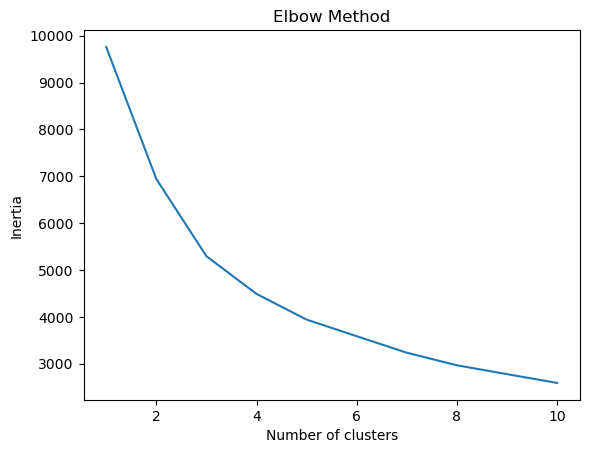

In [46]:
# Prepare to perform unsupervised learning
# 
# Determine the optimal number of clusters using the elbow method

#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=2000, n_init=100, random_state=42,algorithm='elkan')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [62]:
# Assume the optimal number of clusters (k) is determined to be 6
optimal_clusters = 4 #not a clear 'elbow', but makes interpretation of clusters simpler

# Apply k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='random', max_iter=1000, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df_scaled['cluster'] = cluster_labels

df_scaled.head()


c:\Users\szums\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


,home_or_away,team_xG,team_odds,opponent_xG,opponent_odds,team_score,opponent_score,score_differential,cluster
0,1.0,-0.286851,0.087417,0.179607,-1.004651,1.123480,-0.974849,1.309976,0
1,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,1.123480,-1.309976,3
2,1.0,-0.286851,0.087417,-0.753310,0.808564,0.424037,-0.974849,0.873317,3
3,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,-0.974849,0.000000,3
4,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.275406,-0.275406,0.000000,3


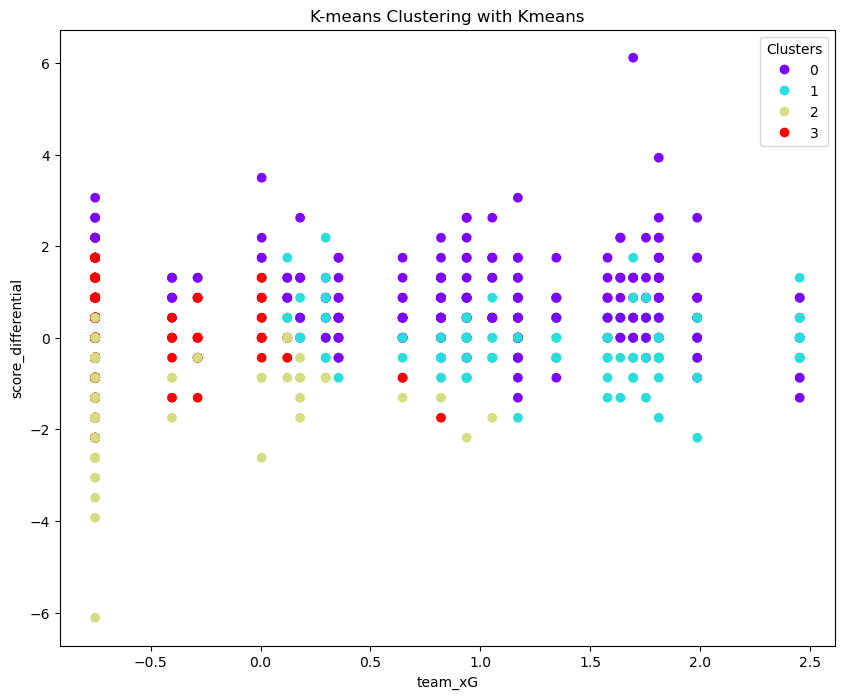

In [65]:
# Plot the clusters

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_scaled['team_xG'], df_scaled['score_differential'], c=df_scaled['cluster'], cmap='rainbow')
plt.title('K-means Clustering with Kmeans')
plt.xlabel('team_xG')
plt.ylabel('score_differential')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

#Interpretation: Purple are teams that were expected to do well (high xG) and did well (high score_differential)
# Yellow were at the other end - low xG and mostly lost their matches.
# Teal had high xG but didn't do so well.
# Red had were expectded to do poorly, but generally won or tied their matches.

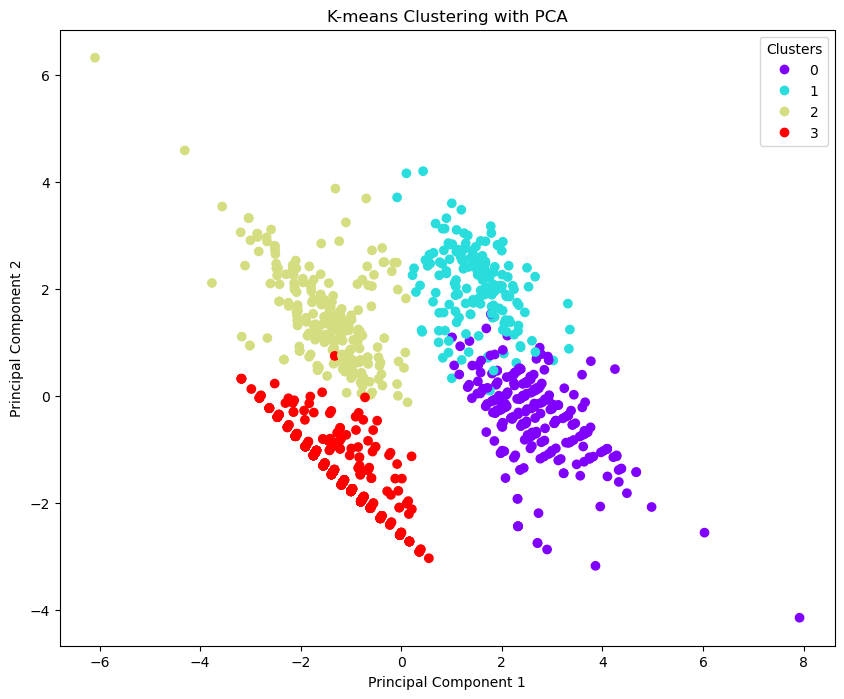

In [67]:

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='rainbow')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

#Interpretation: Teal - team performances that were expected to do well, and did well (all winning their match)
# Purple - team performances that were supposed to do better than they actuall did (mosting losing)
# Yellow - teams that outperformed expectations.
# Red - team that generally lost or tied and were not expected to do well.

In [29]:
#df_scaled.info()
pca_df.head()

,PC1,PC2,Cluster
0,1.552289,0.158188,2
1,-1.503772,-0.656189,0
2,0.860101,-1.771418,0
3,-0.103178,-1.376577,0
4,-0.088403,-1.333868,0


In [30]:
# Prepare for supervised learning.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features and target variable
X = df_scaled.drop(columns=['cluster'])
y = df_scaled['cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        65

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.95      0.94      0.94        64
           2       0.94      0.95      0.95        65

    accuracy                           0.97       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.97      0.97      0.97       224



In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      0.89      0.94        64
           2       0.90      1.00      0.95        65

    accuracy                           0.97       224
   macro avg       0.97      0.96      0.96       224
weighted avg       0.97      0.97      0.97       224



In [33]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.94      0.97        64
           2       0.96      1.00      0.98        65

    accuracy                           0.98       224
   macro avg       0.98      0.98      0.98       224
weighted avg       0.98      0.98      0.98       224



In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       1.00      0.86      0.92        64
           2       0.88      1.00      0.94        65

    accuracy                           0.96       224
   macro avg       0.96      0.95      0.95       224
weighted avg       0.96      0.96      0.96       224



In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.98      0.89      0.93        64
           2       0.90      0.98      0.94        65

    accuracy                           0.96       224
   macro avg       0.96      0.95      0.96       224
weighted avg       0.96      0.96      0.96       224



In [36]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.98660714 0.9375     0.95535714 0.95535714 0.93303571]
Mean Cross-Validation Score: 0.9535714285714285


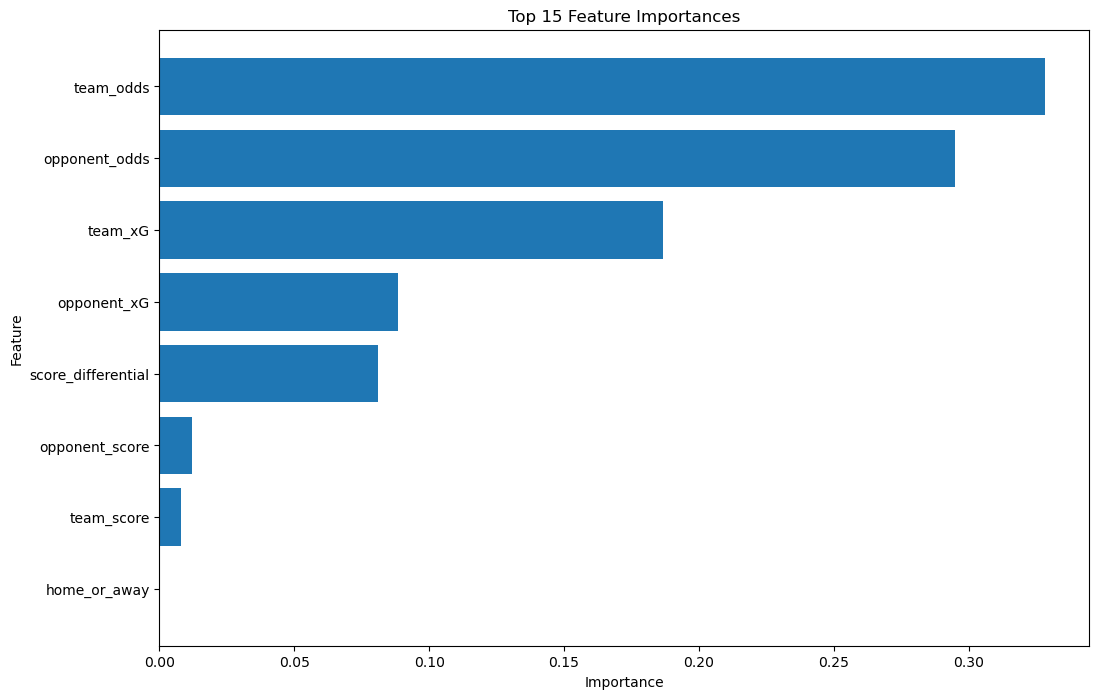

In [37]:
# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Filter the top 15 features
top_features_df = features_df.head(15)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [38]:
# Define features and target variable with emphasis on 'opponent_odds'
important_features = ['opponent_odds'] + [col for col in X_train.columns if col != 'opponent_odds']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Train the model with the re-ordered features
gb_model_important = GradientBoostingClassifier(random_state=42)
gb_model_important.fit(X_train_important, y_train)

# Predict and evaluate
y_pred_important = gb_model_important.predict(X_test_important)
print("Gradient Boosting Classifier Report with Emphasis on opponent_odds:")
print(classification_report(y_test, y_pred_important))


Gradient Boosting Classifier Report with Emphasis on opponent_odds:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.98      0.91      0.94        64
           2       0.91      0.98      0.95        65

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.97      0.96      0.96       224



In [39]:
from sklearn.model_selection import StratifiedKFold

# Perform stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model_important, X_train_important, y_train, cv=skf, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.96111111 0.96648045 0.96089385 0.96089385 0.97206704]
Mean Cross-Validation Score: 0.9642892613283675


In [40]:
# from sklearn.model_selection import GridSearchCV

# # Example of hyperparameter tuning for Gradient Boosting
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_}")

# # Retrain the best model
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# # Predict and evaluate
# best_predictions = best_model.predict(X_test)
# print("Best Model Classifier Report:")
# print(classification_report(y_test, best_predictions))
